# Comparing Antenna Array Calculations with Matlab
Compare the results with the equivalent Matlab code "MatlabFiles/AntennaArray.mlx". [Here](MatlabFiles/AntennaArray.html) is the execution results of this code in Matlab.

In [1]:
import numpy as np
import scipy
import time

import neoradium as nr

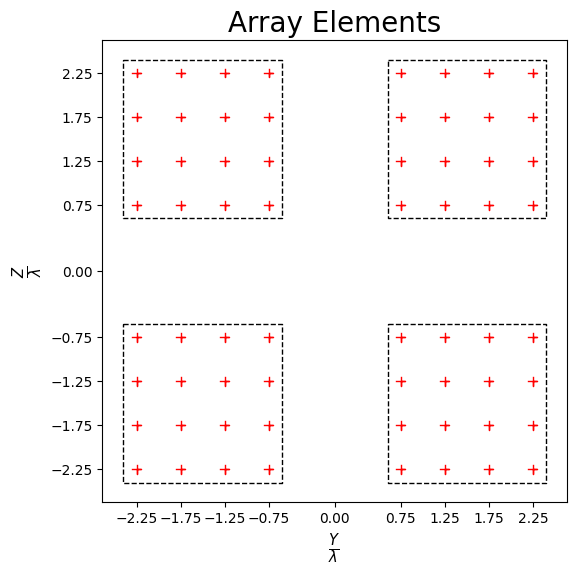

In [2]:
# We first create an antenna element template. The antenna panel class "AntennaPanel" uses this
# template to create the elements of the panel.
elementTemplate = nr.AntennaElement(beamWidth=[65,65], maxAttenuation=30)

# Now we create an antenna panel template. The antenna array class "AntennaArray" uses this template
# to create the panels in the antenna array.
panelTemplate = nr.AntennaPanel([4,4], elements=elementTemplate, polarization="+")

# Now we can create the antenna array using the panel template. Note that the spacing values are multiples of
# wavelength.
antennaArray = nr.AntennaArray([2,2], spacing=[3,3], panels=panelTemplate)

# The "showElements" method draws the antenna array showing all panels and elements.
antennaArray.showElements(zeroTicks=True)


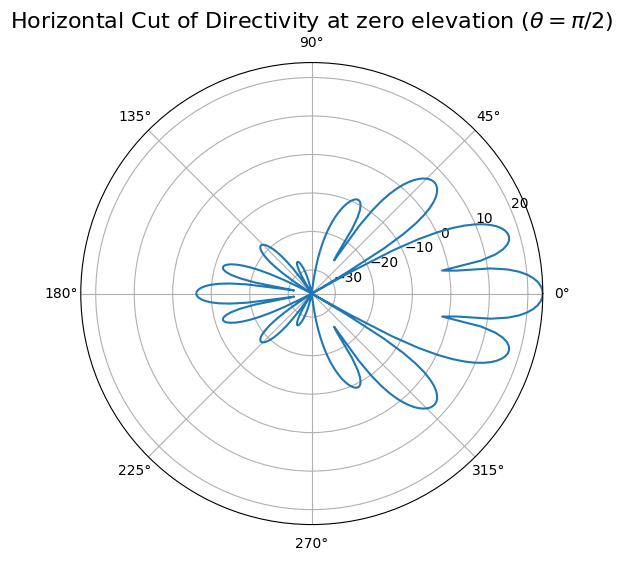

(np.float64(-120.0),
 np.float64(23.88125561687992),
 array([20.06408449, 21.54297586, 22.60588276, 23.32594437, 23.7440555 ,
        23.88125562, 23.7440555 , 23.32594437, 22.60588276, 21.54297586]))

In [3]:
# Depending on the input parameters the "drawRadiation" method can create different types of graphs. Here
# we draw the directivity of the antenna at the horizontal plane of zero elevation. Compare the results with
# the one in the "MatlabFiles/AntennaArray.mlx" file.

radValues = antennaArray.drawRadiation(theta=90, radiationType="Directivity", normalize=False)

# We can print a selected portion of the directivity values returned by this function and compare the results
# with Matlab. 
radValues.min(),radValues.max(),radValues[175:185]

Expected (from Matlab):
```
array([20.06408449, 21.54297586, 22.60588276, 23.32594437, 23.7440555 ,
        23.88125562, 23.7440555 , 23.32594437, 22.60588276, 21.54297586]))
```

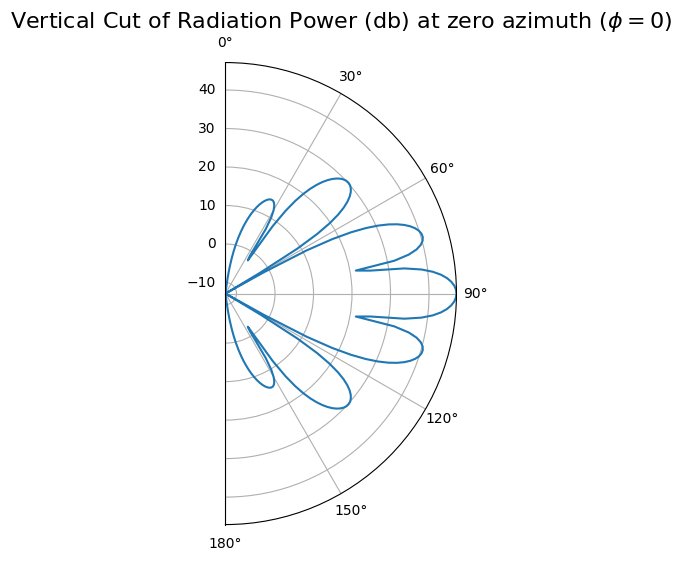

(np.float64(-120.0),
 np.float64(47.13389943631754),
 array([29.63146207, 29.9993008 , 30.13711387, 30.06384822, 29.79202509,
        29.32875878, 28.67612693, 27.83094652, 26.78385309, 25.51736197]))

In [4]:
# Here the "drawRadiation" method is used to draw the radiation power in the vertical plane at azimuth angle 0.
radValues = antennaArray.drawRadiation(phi=0, radiationType="PowerDb", normalize=False)

# Print a selected portion of the power values and compare the results with Matlab. 
radValues.min(),radValues.max(),radValues[130:140]

Expected (From Matlab):
```
array([29.63146207, 29.9993008 , 30.13711387, 30.06384822, 29.79202509,
        29.32875878, 28.67612693, 27.83094652, 26.78385309, 25.51736197]))
```

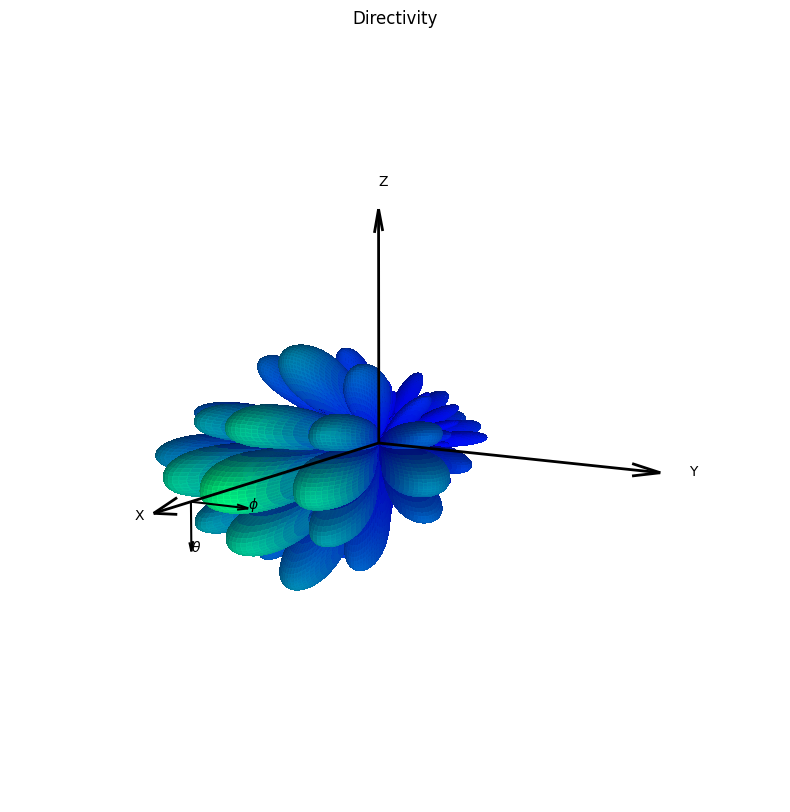

2.9520609378814697 seconds


(np.float64(-120.0),
 np.float64(23.88125561687992),
 array([20.06408449, 21.54297586, 22.60588276, 23.32594437, 23.7440555 ,
        23.88125562, 23.7440555 , 23.32594437, 22.60588276, 21.54297586]))

In [5]:
# Here the "drawRadiation" method is used to draw a 3D graph of directivity.
t0 = time.time()
radValues = antennaArray.drawRadiation(radiationType="Directivity", normalize=True, viewAngles=(30,10), figSize=10)

# We measure the time it takes to complete this action and compare it with Matlab. (In Matlab on average 
# it takes more than 110 seconds with same resolution of the graph)
print(time.time()-t0, "seconds")

# Print a selected portion of the directivity values and compare the results with Matlab. 
radValues.min(),radValues.max(),radValues[85:95,180]

Expected (From Matlab):
```
array([20.06408449, 21.54297586, 22.60588276, 23.32594437, 23.7440555 ,
        23.88125562, 23.7440555 , 23.32594437, 22.60588276, 21.54297586]))
```

In [6]:
# Comparing the directivity calculations with Matlab
directivity = antennaArray.getDirectivity()

# Read the file created by Matlab for "directivity" values
directivityMatlab = scipy.io.loadmat("MatlabFiles/ArrayDirectivity.mat")['directivity']
directivityMatlab = directivityMatlab[:-1,:-1]
directivityMatlab = np.maximum(-120, directivityMatlab)     # We clip the minumum to -120 db (linearly to 1e-12)
assert directivityMatlab.shape==directivity.shape
print("Shape of Directivity results:", directivity.shape)
print("Maximum difference between the results:", np.abs(directivity-directivityMatlab).max())


Shape of Directivity results: (180, 360)
Maximum difference between the results: 4.209880444250302e-09


In [7]:
# Comparing the field calculations with Matlab
field = antennaArray.getField()

# Read the file created by Matlab for "field" values
fieldMatlab = scipy.io.loadmat("MatlabFiles/ArrayField.mat")['field']
fieldMatlab = fieldMatlab[:-1,:-1]
assert fieldMatlab.shape==field.shape
print("Shape of Field values:", field.shape)
print("Maximum difference between the results:", np.abs(field-fieldMatlab).max())


Shape of Field values: (180, 360)
Maximum difference between the results: 4.973799150320701e-13


In [8]:
# Comparing the power calculations with Matlab
powerDb = antennaArray.getPowerPatternDb()

# Read the file created by Matlab for "powerDb" values
powerDbMatlab = scipy.io.loadmat("MatlabFiles/ArrayPowerDb.mat")['powerDb']
powerDbMatlab = powerDbMatlab[:-1,:-1]
powerDbMatlab = np.maximum(-120, powerDbMatlab)             # We clip the minumum to -120 db (linearly to 1e-12)
assert powerDbMatlab.shape==powerDb.shape
maxDiff = np.abs(powerDb-powerDbMatlab).max()
print("Shape of power values:", powerDb.shape)
print("Maximum difference between the results:", np.abs(powerDb-powerDbMatlab).max())


Shape of power values: (180, 360)
Maximum difference between the results: 4.365091399449739e-09
